# Philadelphia Building Demolitions 2007-2022
#### MUSA 550 | Myron Bañez

#### Utilizing building demolition data from OpenDataPhilly, this analysis examines different methods to visualize building demolitions in Philadelphia from January 1st 2007 to September 22nd 2022. 

#### Data source: https://www.opendataphilly.org/dataset/building-demolitions/resource/a9068361-0420-44a3-9547-2363081a17bc
#### _____________________________________________________________

## Importing Data

In [118]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import altair as alt
import seaborn as sns
import geopandas as gpd

In [119]:
censusgeo = gpd.read_file('./ct')
censusgeo

data = './demolition.csv'
demolition = pd.read_csv(data)
demolition

demolition['geometry'] = gpd.points_from_xy(demolition['lng'], demolition['lat'])

censusgeo

,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,LOGRECNO,geometry
0,1,42,101,009400,42101009400,94,Census Tract 94,G5020,S,366717,0,+39.9632709,-075.2322437,10429,"POLYGON ((-75.22927 39.96054, -75.22979 39.960..."
1,2,42,101,009500,42101009500,95,Census Tract 95,G5020,S,319070,0,+39.9658709,-075.2379140,10430,"POLYGON ((-75.23536 39.96852, -75.23535 39.968..."
2,3,42,101,009600,42101009600,96,Census Tract 96,G5020,S,405273,0,+39.9655396,-075.2435075,10431,"POLYGON ((-75.24343 39.96230, -75.24403 39.962..."
3,4,42,101,013800,42101013800,138,Census Tract 138,G5020,S,341256,0,+39.9764504,-075.1771771,10468,"POLYGON ((-75.17341 39.97779, -75.17313 39.977..."
4,5,42,101,013900,42101013900,139,Census Tract 139,G5020,S,562934,0,+39.9750563,-075.1711846,10469,"POLYGON ((-75.17313 39.97776, -75.17341 39.977..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,380,42,101,037200,42101037200,372,Census Tract 372,G5020,S,1028984,0,+39.9129487,-075.1599379,10690,"POLYGON ((-75.17135 39.91678, -75.17127 39.916..."
380,381,42,101,038300,42101038300,383,Census Tract 383,G5020,S,3064496,0,+40.0108630,-075.1248984,10700,"POLYGON ((-75.11627 40.01743, -75.11663 40.016..."
381,382,42,101,039000,42101039000,390,Census Tract 390,G5020,S,2032689,0,+40.0357300,-075.0938840,10707,"POLYGON ((-75.08824 40.04034, -75.08838 40.039..."
382,383,42,101,037800,42101037800,378,Census Tract 378,G5020,S,3760084,1936838,+39.9805802,-075.0956845,10695,"POLYGON ((-75.11051 39.96952, -75.11289 39.968..."


In [120]:
censusgeo.rename(columns = {'NAME10': 'Tract'}, inplace = True)

## Data Manipulation

### Renaming and dropping columns from the census tracts data.

In [121]:
censusgeo.rename(columns = {'NAME10': 'Tract'}, inplace = True)
censusgeo 

philly = censusgeo.drop(['OBJECTID', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'GEOID10', 'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'LOGRECNO'], axis=1)

philly['Tract'] = philly['Tract'].astype(float)

philly


,Tract,geometry
0,94.0,"POLYGON ((-75.22927 39.96054, -75.22979 39.960..."
1,95.0,"POLYGON ((-75.23536 39.96852, -75.23535 39.968..."
2,96.0,"POLYGON ((-75.24343 39.96230, -75.24403 39.962..."
3,138.0,"POLYGON ((-75.17341 39.97779, -75.17313 39.977..."
4,139.0,"POLYGON ((-75.17313 39.97776, -75.17341 39.977..."
...,...,...
379,372.0,"POLYGON ((-75.17135 39.91678, -75.17127 39.916..."
380,383.0,"POLYGON ((-75.11627 40.01743, -75.11663 40.016..."
381,390.0,"POLYGON ((-75.08824 40.04034, -75.08838 40.039..."
382,378.0,"POLYGON ((-75.11051 39.96952, -75.11289 39.968..."


### Dropping columns from the building demolition data. 

In [122]:
demolition_df = demolition.drop(['the_geom', 'the_geom_webmercator', 'objectid', 'addressobjectid', 
                 'parcel_id_num', 'opa_account_num', 'unit_type', 'unit_num', 'opa_owner', 
                 'caseorpermitnumber', 'record_type', 'typeofworkdescription', 'contractorstate', 
                 'contractorzip', 'systemofrecord', 'geocode_x', 'geocode_y', 'council_district', 
                 'posse_jobid', 'applicanttype', 'applicantname', 'contractorname', 'contractortype', 
                 'contractoraddress1', 'contractoraddress2', 'contractorcity'], axis=1)

demolition_df

,address,zip,censustract,typeofwork,city_demo,start_date,completed_date,status,mostrecentinsp,lat,lng,geometry
0,2521 SALMON ST,19125-4010,378.00,FULL,NO,2019-10-07 09:30:40,2020-02-14 11:34:22,COMPLETED,2020-02-14 11:31:00,39.975147,-75.117654,POINT (-75.11765 39.97515)
1,338-48 E WALNUT LN,19144-1034,252.00,TANKRI,NO,2019-08-08 11:36:52,2019-12-19 15:16:41,COMPLETED,2019-12-19 15:15:00,40.045120,-75.173062,POINT (-75.17306 40.04512)
2,1131 N DELAWARE AVE,19125-4304,142.00,MINOR DEMOLITION,NO,2019-08-16 10:34:00,2020-08-03 14:29:33,COMPLETED,2020-08-03 14:29:32,39.965209,-75.130352,POINT (-75.13035 39.96521)
3,1309 N 25TH ST,19121-4713,138.00,FULL,NO,2019-08-21 10:04:26,2019-10-18 07:37:02,COMPLETED,2019-10-18 07:35:00,39.975737,-75.176621,POINT (-75.17662 39.97574)
4,3523 HAVERFORD AVE,19104-1910,109.00,MINOR DEMOLITION,NO,2020-01-30 11:08:00,2021-06-14 08:14:26,COMPLETED,2021-06-10 12:54:52,39.964033,-75.194012,POINT (-75.19401 39.96403)
...,...,...,...,...,...,...,...,...,...,...,...,...
12296,959-67 N 8TH ST,19123-1303,141.00,MAJOR DEMOLITION,NO,2022-03-23 00:00:00,2022-06-14 12:29:00,COMPLETED,2022-06-13 12:42:42,39.969989,-75.149747,POINT (-75.14975 39.96999)
12297,2324 MARKET ST,19103-3008,4.01,MAJOR DEMOLITION,NO,2022-06-10 00:00:00,NaN,ISSUED,2022-08-08 08:31:05,39.953981,-75.178751,POINT (-75.17875 39.95398)
12298,4743 FOWLER ST,19127-1001,215.00,MINOR DEMOLITION,NO,2022-06-14 00:00:00,2022-08-26 07:43:26,COMPLETED,2022-08-25 12:20:07,40.034036,-75.228065,POINT (-75.22807 40.03404)
12299,2314 MARKET ST,19103-3008,4.01,MAJOR DEMOLITION,NO,2022-06-09 00:00:00,NaN,ISSUED,2022-08-08 08:29:36,39.953954,-75.178540,POINT (-75.17854 39.95395)


### The data is melted from wide to tidy format and another column, "status", is dropped from the dataframe.

In [123]:
demolition_df_clean = pd.melt(
    demolition_df, 
    id_vars=["censustract", "mostrecentinsp", "lat", "lng"],
    value_vars=demolition_df.columns[7],
    value_name="demolished", 
    var_name="status"
)

demolition_df_clean

demolition_df_clean1 = demolition_df_clean.drop(['status'], axis=1)
demolition_df_clean1

,censustract,mostrecentinsp,lat,lng,demolished
0,378.00,2020-02-14 11:31:00,39.975147,-75.117654,COMPLETED
1,252.00,2019-12-19 15:15:00,40.045120,-75.173062,COMPLETED
2,142.00,2020-08-03 14:29:32,39.965209,-75.130352,COMPLETED
3,138.00,2019-10-18 07:35:00,39.975737,-75.176621,COMPLETED
4,109.00,2021-06-10 12:54:52,39.964033,-75.194012,COMPLETED
...,...,...,...,...,...
12296,141.00,2022-06-13 12:42:42,39.969989,-75.149747,COMPLETED
12297,4.01,2022-08-08 08:31:05,39.953981,-75.178751,ISSUED
12298,215.00,2022-08-25 12:20:07,40.034036,-75.228065,COMPLETED
12299,4.01,2022-08-08 08:29:36,39.953954,-75.178540,ISSUED


### The "mostrecentinsp" column is converted to an appropriate date format to extract just the year.

In [124]:
demolition_df_clean1["mostrecentinsp"] = pd.to_datetime(demolition_df_clean1["mostrecentinsp"])
date_strings = demolition_df_clean1["mostrecentinsp"].dt.strftime("%Y")

date_strings.iloc[0]
demolition_df_clean1["mostrecentinsp"] = date_strings
demolition_df_clean1

,censustract,mostrecentinsp,lat,lng,demolished
0,378.00,2020,39.975147,-75.117654,COMPLETED
1,252.00,2019,40.045120,-75.173062,COMPLETED
2,142.00,2020,39.965209,-75.130352,COMPLETED
3,138.00,2019,39.975737,-75.176621,COMPLETED
4,109.00,2021,39.964033,-75.194012,COMPLETED
...,...,...,...,...,...
12296,141.00,2022,39.969989,-75.149747,COMPLETED
12297,4.01,2022,39.953981,-75.178751,ISSUED
12298,215.00,2022,40.034036,-75.228065,COMPLETED
12299,4.01,2022,39.953954,-75.178540,ISSUED


In [125]:
demolition_df_clean1["mostrecentinsp"] = pd.to_datetime(demolition_df_clean1["mostrecentinsp"])
demolition_df_clean1['Year'] = demolition_df_clean1['mostrecentinsp'].dt.year
demolition_df_clean1 = demolition_df_clean1.drop(['mostrecentinsp'], axis=1)
demolition_df_clean1

,censustract,lat,lng,demolished,Year
0,378.00,39.975147,-75.117654,COMPLETED,2020.0
1,252.00,40.045120,-75.173062,COMPLETED,2019.0
2,142.00,39.965209,-75.130352,COMPLETED,2020.0
3,138.00,39.975737,-75.176621,COMPLETED,2019.0
4,109.00,39.964033,-75.194012,COMPLETED,2021.0
...,...,...,...,...,...
12296,141.00,39.969989,-75.149747,COMPLETED,2022.0
12297,4.01,39.953981,-75.178751,ISSUED,2022.0
12298,215.00,40.034036,-75.228065,COMPLETED,2022.0
12299,4.01,39.953954,-75.178540,ISSUED,2022.0


In [126]:
demolition_df_clean1 = demolition_df_clean1.dropna(axis=0)
demolition_df_clean1['Year']= demolition_df_clean1['Year'].astype(int)
demolition_df_clean1

/var/folders/xc/byy5_h_56dn73vqd63__dpmh0000gn/T/ipykernel_83647/1364086416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demolition_df_clean1['Year']= demolition_df_clean1['Year'].astype(int)


,censustract,lat,lng,demolished,Year
0,378.00,39.975147,-75.117654,COMPLETED,2020
1,252.00,40.045120,-75.173062,COMPLETED,2019
2,142.00,39.965209,-75.130352,COMPLETED,2020
3,138.00,39.975737,-75.176621,COMPLETED,2019
4,109.00,39.964033,-75.194012,COMPLETED,2021
...,...,...,...,...,...
12296,141.00,39.969989,-75.149747,COMPLETED,2022
12297,4.01,39.953981,-75.178751,ISSUED,2022
12298,215.00,40.034036,-75.228065,COMPLETED,2022
12299,4.01,39.953954,-75.178540,ISSUED,2022


### In order to examine just the completed building demolitions, I will query for just the observations where demolition is complete.

In [127]:
completed = ["COMPLETED"]
demolition_df_clean1 = demolition_df_clean1.query("demolished in @completed")
demolition_df_clean1

,censustract,lat,lng,demolished,Year
0,378.0,39.975147,-75.117654,COMPLETED,2020
1,252.0,40.045120,-75.173062,COMPLETED,2019
2,142.0,39.965209,-75.130352,COMPLETED,2020
3,138.0,39.975737,-75.176621,COMPLETED,2019
4,109.0,39.964033,-75.194012,COMPLETED,2021
...,...,...,...,...,...
12292,144.0,39.968925,-75.135052,COMPLETED,2022
12295,23.0,39.935261,-75.162370,COMPLETED,2022
12296,141.0,39.969989,-75.149747,COMPLETED,2022
12298,215.0,40.034036,-75.228065,COMPLETED,2022


## Analysis

### The sum of demolitions is taken grouped by census tract and year. This is followed by renaming of columns for a more suitable title and dropping an additional column.

In [128]:
demolition_df_analysis = demolition_df_clean1.groupby(['censustract', 'Year', 'demolished']).size()
demolition_df_analysis = demolition_df_analysis.reset_index()
demolition_df_analysis

demolition_df_analysis.rename(columns = {0:'sum', 'censustract':'Tract'}, inplace = True)
demolition_df_analysis1 = demolition_df_analysis.drop(['demolished'], axis=1)
demolition_df_analysis1

,Tract,Year,sum
0,1.0,2008,1
1,1.0,2009,1
2,1.0,2013,4
3,1.0,2014,4
4,1.0,2016,3
...,...,...,...
3092,9809.0,2020,1
3093,9891.0,2010,1
3094,9891.0,2013,1
3095,9891.0,2014,1


### I am first interested in the total number of demolitions by year, so I am preparing another dataframe to gather this data.

In [129]:
demolition_df_analysis2 = demolition_df_analysis1.groupby(['Year'])['sum'].sum()
demolition_df_analysis2 = demolition_df_analysis2.reset_index()
demolition_df_analysis2

,Year,sum
0,2007,112
1,2008,298
2,2009,792
3,2010,734
4,2011,796
5,2012,917
6,2013,824
7,2014,835
8,2015,897
9,2016,972


### Matplotlib is used to visualize this data to show a clear and simple overview of high level information regarding building demolition. As a result of showing total demolitions by year, a bar plot easily depicts this data to compare the years side by side and identify trends.

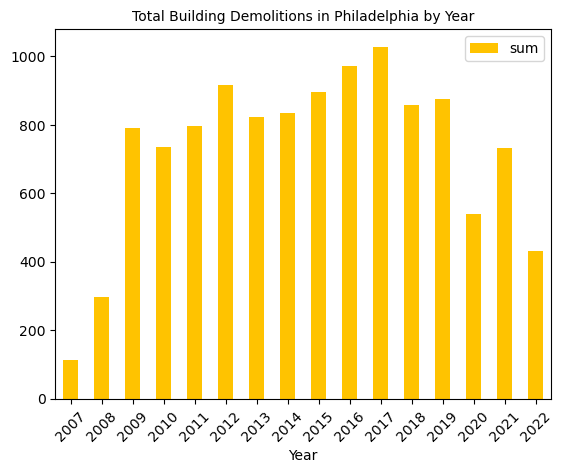

In [130]:
### Matplotlib Chart 

ax = demolition_df_analysis2.plot.bar(x='Year', y='sum', rot=0, color='#ffc300')
plt.xticks(rotation = 45)
plt.title("Total Building Demolitions in Philadelphia by Year", fontsize=10)
plt.show()

#### The data shows that 2017 has seen the greatest numver of building demolitions totaling slightly above 1,000. Another point of interest of this chart shows a drastic increase in demolitions from 2008 to 2009, as well as a notable decrease in 2020 which may be attributed to COVID-19.

### I am also interested in what census tract had the greatest number of demolitions. To approach this I will group the initial demolition_df_analysis1 dataframe by tract and retreieve the sum of demolitions.

In [131]:
phl_demolition_stats = demolition_df_analysis1.groupby(['Tract'])['sum'].sum()
phl_demolition_stats = phl_demolition_stats.reset_index()
phl_demolition_stats

,Tract,sum
0,1.00,21
1,2.00,34
2,3.00,20
3,4.01,13
4,4.02,13
...,...,...
357,9806.00,3
358,9807.00,22
359,9808.00,3
360,9809.00,27


### The transformed dataframe can now be merged to the Philadelphia census tracts.

In [132]:
phl_demolition = philly.merge(phl_demolition_stats, on='Tract')
phl_demolition 

,Tract,geometry,sum
0,94.0,"POLYGON ((-75.22927 39.96054, -75.22979 39.960...",28
1,95.0,"POLYGON ((-75.23536 39.96852, -75.23535 39.968...",34
2,96.0,"POLYGON ((-75.24343 39.96230, -75.24403 39.962...",38
3,138.0,"POLYGON ((-75.17341 39.97779, -75.17313 39.977...",175
4,139.0,"POLYGON ((-75.17313 39.97776, -75.17341 39.977...",110
...,...,...,...
357,372.0,"POLYGON ((-75.17135 39.91678, -75.17127 39.916...",7
358,383.0,"POLYGON ((-75.11627 40.01743, -75.11663 40.016...",28
359,390.0,"POLYGON ((-75.08824 40.04034, -75.08838 40.039...",8
360,378.0,"POLYGON ((-75.11051 39.96952, -75.11289 39.968...",39


### Visualizing building demolitions by census tracts on a map allows viewers to see if there are any spatial relationships with demolitions to determine if there are particular areas that are more likely to experience demolitions.

In [140]:
### Altair Chart 1

demolitions_map = phl_demolition.set_crs(epsg=4326)

chart = (
    alt.Chart(demolitions_map)
    .mark_geoshape(stroke="white")
    .encode(
        tooltip=["sum:Q", "Tract:N"],
        color=alt.Color("sum:Q", scale=alt.Scale(scheme='goldred'))
    ).properties(width=700, height=700, title='Total Building Demolitions from 2007-2022 by Census Tract'
)
)

chart

chart.save('chart.json')

#### From 2007 to 2022, census tract 169.02 has seen the greatest number of building demolitions at 254. The plot shows that a majority of demolitions have occurred in the census tracts just north of Center City.

### Seeing the census tracts that have experienced the greatest number of building demolitions, I now want to see the census tract with the highest amount of demolitions by year, and will return those tract with the greatest sum by year.

In [134]:
demolition_analysis = demolition_df_analysis1.loc[demolition_df_analysis1.groupby(['Year'])['sum'].idxmax()]
demolition_analysis

,Tract,Year,sum
1233,140.00,2007,7
1021,111.00,2008,22
1574,167.01,2009,19
1384,151.02,2010,30
1621,169.01,2011,68
1608,168.00,2012,29
1721,174.00,2013,22
1639,169.02,2014,26
1389,151.02,2015,23
1211,138.00,2016,33


### Next, I can gather the data from these tracts from every year to understand if there are trends in building demolition.

In [135]:
maintracts = [140.00,111.00, 167.01, 151.02, 169.01, 168.00,174.00,169.02,151.02,138.00,
              167.01,138.00,13.00, 149.00,169.02,138.00]
demolition_data = demolition_df_analysis1.query("Tract in @maintracts")

demolition_data

,Tract,Year,sum
116,13.0,2007,2
117,13.0,2008,1
118,13.0,2009,5
119,13.0,2010,1
120,13.0,2011,2
...,...,...,...
1726,174.0,2018,5
1727,174.0,2019,8
1728,174.0,2020,4
1729,174.0,2021,4


### By converting the data frame into a pivot table and converting the type to float, I use the seaborn package to create an annotated heatmap. This style was chosen in order to clearly input the tract and year in order to understand either trends by year or trends by tract while clearly pointing to the highest total by year. However, some cells are blank, denoting no demolitions in that tract for that year.

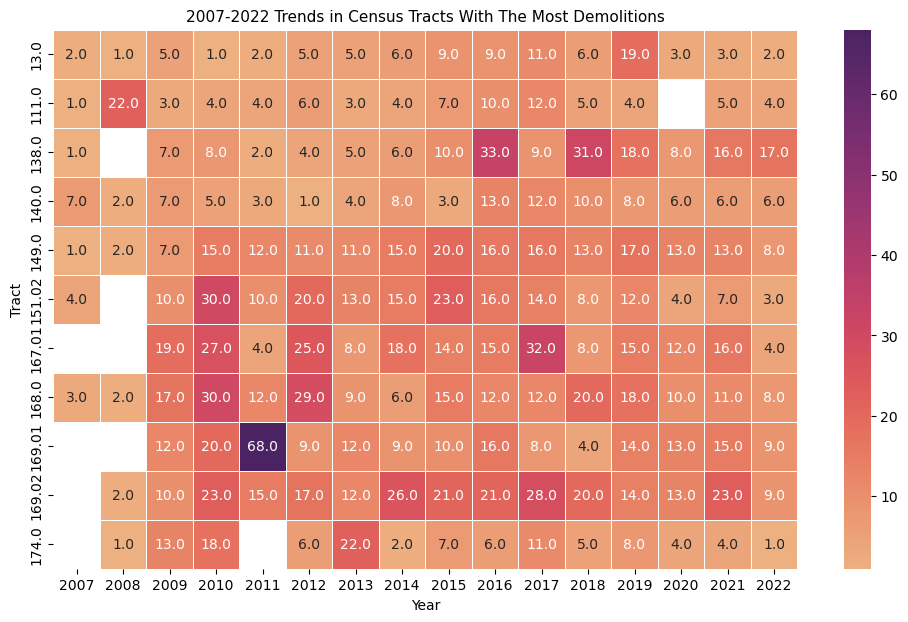

AttributeError: 'DataFrame' object has no attribute 'save'

In [141]:
### Seaborn Chart

demo_data_pivot = demolition_data.pivot_table(index='Tract', columns='Year', values='sum', 
               aggfunc='sum')


demolition_data_pivot = demo_data_pivot.astype(float)

plt.figure(figsize=(12, 7))
plt.title("2007-2022 Trends in Census Tracts With The Most Demolitions", fontsize =11)
ax = sns.heatmap(demolition_data_pivot, annot=True, fmt="", cmap="flare", linewidths=.5)
plt.show()

#### Looking at just the top census tracts, census tract 169.01 in 2011 sticks out with the largest amount of building demolitions at 68. Additionally of the top census tracts, 2010 sticks out as a year with many building demolitions simply by the amount and consistency of the darker color of the cells. 

### Another way to visualize this data is by creating a brush plot that allows for interactivity to see building demolitions over time in the individual census tracts.

In [142]:
### Altair Chart 2: Brush

brush = alt.selection_interval()


chart2 = alt.Chart(demolition_data).mark_point().encode(
    x=alt.X("Year:N", scale=alt.Scale(zero=False)), 
    y=alt.Y("sum", scale=alt.Scale(zero=False)), 
    color=alt.condition(brush, "sum", alt.value("lightgray"), scale=alt.Scale(scheme='goldred')), 
    tooltip=["Tract", "Year", "sum"], 
).properties(
    width=200, height=200, selection=brush, 
).facet(facet="Tract", columns=4)

chart2.save('chart2.json')

#### The plot shows the extreme increase in demolitions in tract 169.01 in 2011. The plot also visualizes consistent and comparitively more demolitions in tracts 167.01, 168, and 169.02 than the other tracts. 

### After further analyzing individual census tracts, I now want to see what share of demolitions the top census tracts had by year using a stacked bar plot. This method allows for color coding visualizing the census tracts within each year while comparing across years and an interactive tool to exactly see the exact number of demolitions.

In [146]:
### Altair Chart 3: Transforming
(
    alt.Chart(demolition_data)
    .mark_bar()
    .encode(
        x=alt.X('sum:Q', aggregate='sum'),
        y='Year:N',
        color=alt.Color('Tract:N', scale=alt.Scale(scheme='darkred')),
        tooltip=['Year','Tract', 'sum(sum):Q']
    ).properties(
    height=400,
    width=850,
    title='Total Building Demolitions from 2007-2022 with Shares by Census Tract')
)

chart3.save('chart3.json')

#### This plot reaffirms that in 2011, census tract 169.01 saw a major increase in building demolitions when compared to the rest of the years. Although tract 169.01 experienced drastically more demolitions in 2011, year 2010 also sticks out as the year with the greatest building demolitions for the top census tracts.